In [34]:
import scanpy as sc
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
import seaborn as sns

#from gprofiler import gprofiler

import warnings
#from rpy2.rinterface import RRuntimeWarning
#from rpy2.robjects import pandas2ri

In [5]:
#read in all datasets
adata=sc.read("/mnt/data/ltt/data/scRNAseq/igt_s9_fine_counts.h5ad")

In [13]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

In [14]:
# 提取并保存到文件
target_genes = ['CD7', 'KIAA0319L']
# 提取表达矩阵
expression_df = pd.DataFrame(
    adata[:, target_genes].X.toarray(),
    index=adata.obs_names,
    columns=target_genes
)

In [26]:
adata.obs

,cohortID,cohortName,datasetID,donorID,sampleID,system,tissue,region,sampleType,cellSort,...,total_counts_HSP,pct_counts_HSP,S_score,G2M_score,phase,ann1,ann2,ann3,majorCluster,subCluster
D01-AAACCTGAGACACTAA-1-bladder,C01,AHCA,D01,AHCA,Bladder,Urinary,Bladder,Bladder,Fresh,Total,...,3.0,0.267142,-0.024742,-0.043153,G1,Myeloid,MoMph,M05_Mo_CD14,Myeloid,M05_Mo_CD14
D01-AAACCTGAGCATGGCA-1-bladder,C01,AHCA,D01,AHCA,Bladder,Urinary,Bladder,Bladder,Fresh,Total,...,16.0,0.465522,-0.117441,-0.067612,G1,Myeloid,MoMph,M09_Mph_FOLR2,Myeloid,M09_Mph_FOLR2
D01-AAACCTGAGCTGAACG-1-bladder,C01,AHCA,D01,AHCA,Bladder,Urinary,Bladder,Bladder,Fresh,Total,...,9.0,0.507614,-0.039417,0.034555,G2M,TILC,CD4T,CD4T02_Tn_CCR7,CD4T,CD4T02_Tn_CCR7
D01-AAACCTGCAAGCTGGA-1-bladder,C01,AHCA,D01,AHCA,Bladder,Urinary,Bladder,Bladder,Fresh,Total,...,9.0,0.581020,-0.113236,-0.097490,G1,Stromal,Fb,S06_Fb_ARID5B,Stromal,S06_Fb_ARID5B
D01-AAACCTGCATTACCTT-1-bladder,C01,AHCA,D01,AHCA,Bladder,Urinary,Bladder,Bladder,Fresh,Total,...,13.0,0.990854,-0.091779,-0.048379,G1,TILC,CD8T,CD8T04_Trm_HSPA1A,CD8T,CD8T04_Trm_HSPA1A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D33-TTTGTCACAGTATCTG-1-Vagina05,C26,VaginaGSE151202,D33,Vagina05,Vagina05,Reproductive,Vagina,Vaginal Wall,Fresh,Total,...,40.0,0.726612,-0.088567,-0.065403,G1,Stromal,Fb,S06_Fb_ARID5B,Stromal,S06_Fb_ARID5B
D33-TTTGTCAGTTCTCATT-1-Vagina05,C26,VaginaGSE151202,D33,Vagina05,Vagina05,Reproductive,Vagina,Vaginal Wall,Fresh,Total,...,49.0,1.206302,-0.059540,-0.060652,G1,Stromal,Fb,S06_Fb_ARID5B,Stromal,S06_Fb_ARID5B
D33-TTTGTCATCAAAGACA-1-Vagina05,C26,VaginaGSE151202,D33,Vagina05,Vagina05,Reproductive,Vagina,Vaginal Wall,Fresh,Total,...,75.0,1.453770,-0.135025,-0.044694,G1,Stromal,Fb,S06_Fb_ARID5B,Stromal,S06_Fb_ARID5B
D33-TTTGTCATCCTTCAAT-1-Vagina05,C26,VaginaGSE151202,D33,Vagina05,Vagina05,Reproductive,Vagina,Vaginal Wall,Fresh,Total,...,32.0,0.386054,-0.034825,-0.102915,G1,End,E01_Artery_IGFBP3,NaN,Endothelial,E01_Artery_IGFBP3


In [28]:
exp_df=pd.merge(expression_df, adata.obs, how='inner', left_index=True, right_index=True)


In [6]:
system =adata.obs.system.cat.categories
tissue =adata.obs.tissue.cat.categories
region =adata.obs.region.cat.categories
majorCluster =adata.obs.majorCluster.cat.categories
print(len(system))
print(len(tissue))
print(len(region))
print(len(majorCluster))

10
35
101
8


In [30]:
# 1. 准备数据
#df = adata.to_df()
#df['majorCluster'] = adata.obs['majorCluster']
#df['tissue'] = adata.obs['tissue']

# 2. 计算每个 system 和 tissue 组合下 CD7 的平均表达量
pivot_data = exp_df.groupby(['tissue', 'majorCluster'])['CD7'].mean().unstack()

# 3. 自定义颜色映射（从白色到深红色）
from matplotlib.colors import LinearSegmentedColormap
red_cmap = LinearSegmentedColormap.from_list(
    'red_gradient', 
    ['white', '#FF9999', '#FF5733', '#C70039', '#900C3F']
)

In [31]:
import numpy as np

# 1. 检查数据中是否存在 NaN 或 inf
print("数据中是否存在 NaN:", np.isnan(pivot_data).any().any())
print("数据中是否存在 inf:", np.isinf(pivot_data).any().any())

数据中是否存在 NaN: True
数据中是否存在 inf: False


In [32]:
if np.isnan(pivot_data).any().any() or np.isinf(pivot_data).any().any():
    # 方法一：用 0 填充 NaN（适用于表达量数据）
    pivot_data = pivot_data.fillna(0)
    pivot_data = pivot_data.replace([np.inf, -np.inf], 0)

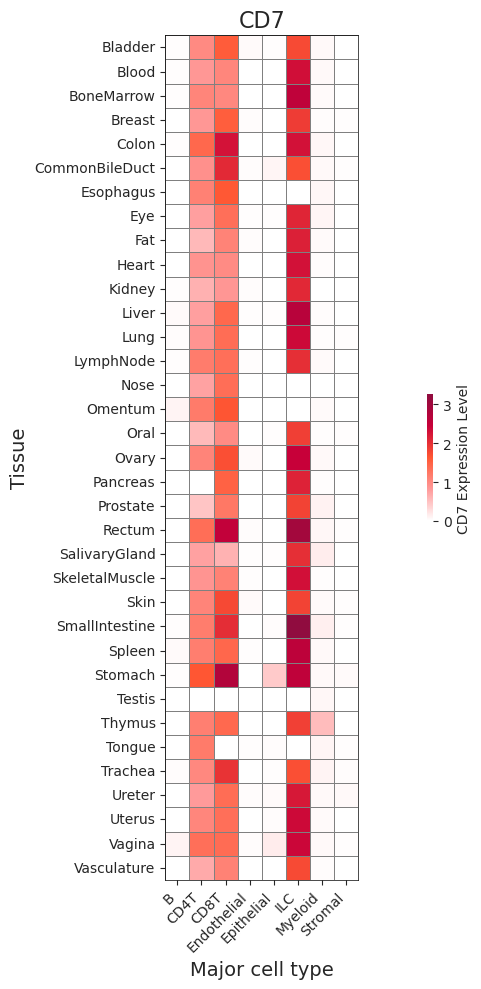

In [80]:
sns.set_style("ticks")

# 4. 绘制热图
plt.figure(figsize=(14, 10))  # 调整图像大小
g=sns.heatmap(
    pivot_data,
    cmap=red_cmap,           # 使用自定义颜色映射
    annot=False,              # 显示每个单元格的数值
    #fmt='.2f',               # 数值格式：保留两位小数
    linewidths=0.5,          # 单元格边框宽度
    linecolor = "grey",
    cbar_kws={'label': 'CD7 Expression Level',
              'location': 'right','shrink': 0.15},  # 颜色条标签
    square=True,             # 使单元格为正方形
    #robust=True,             # 使用更稳健的颜色映射（忽略极端值）
    #row_cluster=True,
    #col_cluster=True
)
for spine in g.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(0.5)            # 外边框宽度
    spine.set_color('black')          # 外边框颜色

# 5. 优化标题和标签
plt.title('CD7', fontsize=16)
plt.xlabel('Major cell type', fontsize=14)
plt.ylabel('Tissue', fontsize=14)
plt.xticks(rotation=45, ha='right')  # x轴标签旋转45度
plt.tight_layout()  # 自动调整布局
# 6. 保存图像（可选）
plt.savefig('/home/chengennong/ylp/aav/cd7_exp/fig/heatmap_CD7_shi.pdf', bbox_inches='tight')
plt.show()

In [88]:
# 1. 准备数据
#df1 = adata.to_df()
#df1['majorCluster'] = adata.obs['majorCluster']
#df1['tissue'] = adata.obs['tissue']

# 2. 计算每个 system 和 tissue 组合下 CD7 的平均表达量
pivot_data1 = exp_df.groupby(['tissue', 'majorCluster'])['KIAA0319L'].mean().unstack()

# 3. 自定义颜色映射（从白色到深红色）
from matplotlib.colors import LinearSegmentedColormap
red_cmap = LinearSegmentedColormap.from_list(
    'red_gradient', 
    ['white', '#FF9999', '#FF5733', '#C70039', '#900C3F']
)
green_cmap2 = LinearSegmentedColormap.from_list(
    'green_gradient2', 
    ['white', '#CCFFCC', '#66FF66', '#00CC00', '#008000']
)

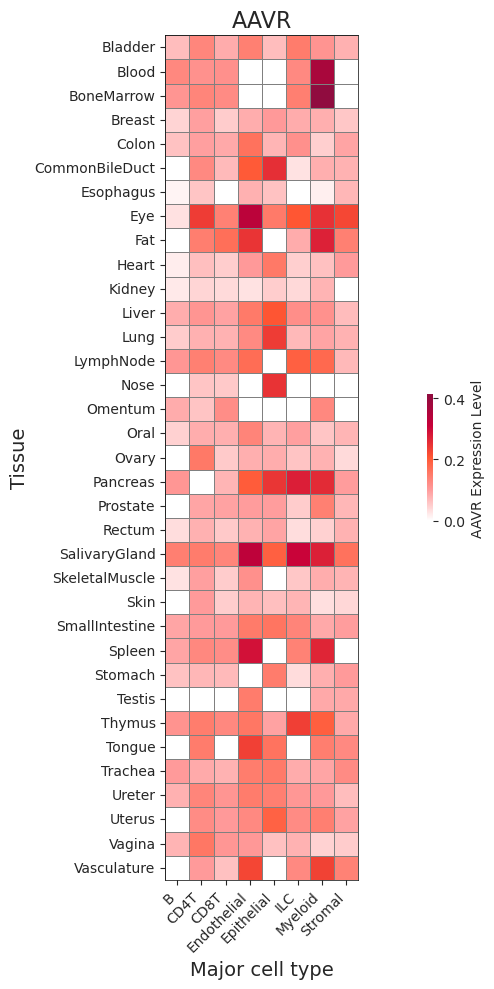

In [90]:
# 4. 绘制热图
plt.figure(figsize=(14, 10))  # 调整图像大小
g=sns.heatmap(
    pivot_data1,
    cmap=red_cmap,           # 使用自定义颜色映射
    annot=False,              # 显示每个单元格的数值
    #fmt='.2f',               # 数值格式：保留两位小数
    linewidths=0.5,          # 单元格边框宽度
    linecolor = "grey",
    cbar_kws={'label': 'AAVR Expression Level',
              'location': 'right','shrink': 0.15},  # 颜色条标签
    square=True,             # 使单元格为正方形
    #robust=True,             # 使用更稳健的颜色映射（忽略极端值）
    #row_cluster=True,
    #col_cluster=True
)
for spine in g.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(0.5)            # 外边框宽度
    spine.set_color('black')          # 外边框颜色

# 5. 优化标题和标签
plt.title('AAVR', fontsize=16)
plt.xlabel('Major cell type', fontsize=14)
plt.ylabel('Tissue', fontsize=14)
plt.xticks(rotation=45, ha='right')  # x轴标签旋转45度
plt.tight_layout()  # 自动调整布局
# 6. 保存图像（可选）
plt.savefig('/home/chengennong/ylp/aav/cd7_exp/fig/heatmap_AAVR_shi.pdf', bbox_inches='tight')
plt.show()

In [281]:
df_long = exp_df.melt(
    id_vars=['tissue'],          # 保持不变的列
    value_vars=['CD7', 'KIAA0319L'],  # 要转换的列
    var_name='Gene',             # 新列名：基因名称
    value_name='Expression'      # 新列名：表达量
)


In [286]:
exp_df.to_csv("/home/chengennong/ylp/aav/cd7_exp/fig/Shi_exp_df.csv")

In [283]:
df_tissue_mean = df_long.groupby(['tissue', 'Gene']).mean().unstack().reset_index()

In [204]:
df_tissue_mean.columns = ['tissue', 'CD7',"KIAA0319L"]

/tmp/ipykernel_69416/1365867480.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_69416/1365867480.py:8: UserWarning: 
The palette list has fewer values (1) than needed (35) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(
/tmp/ipykernel_69416/1365867480.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_69416/1365867480.py:24: UserWarning: 
The palette list has fewer values (1) than needed (35) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


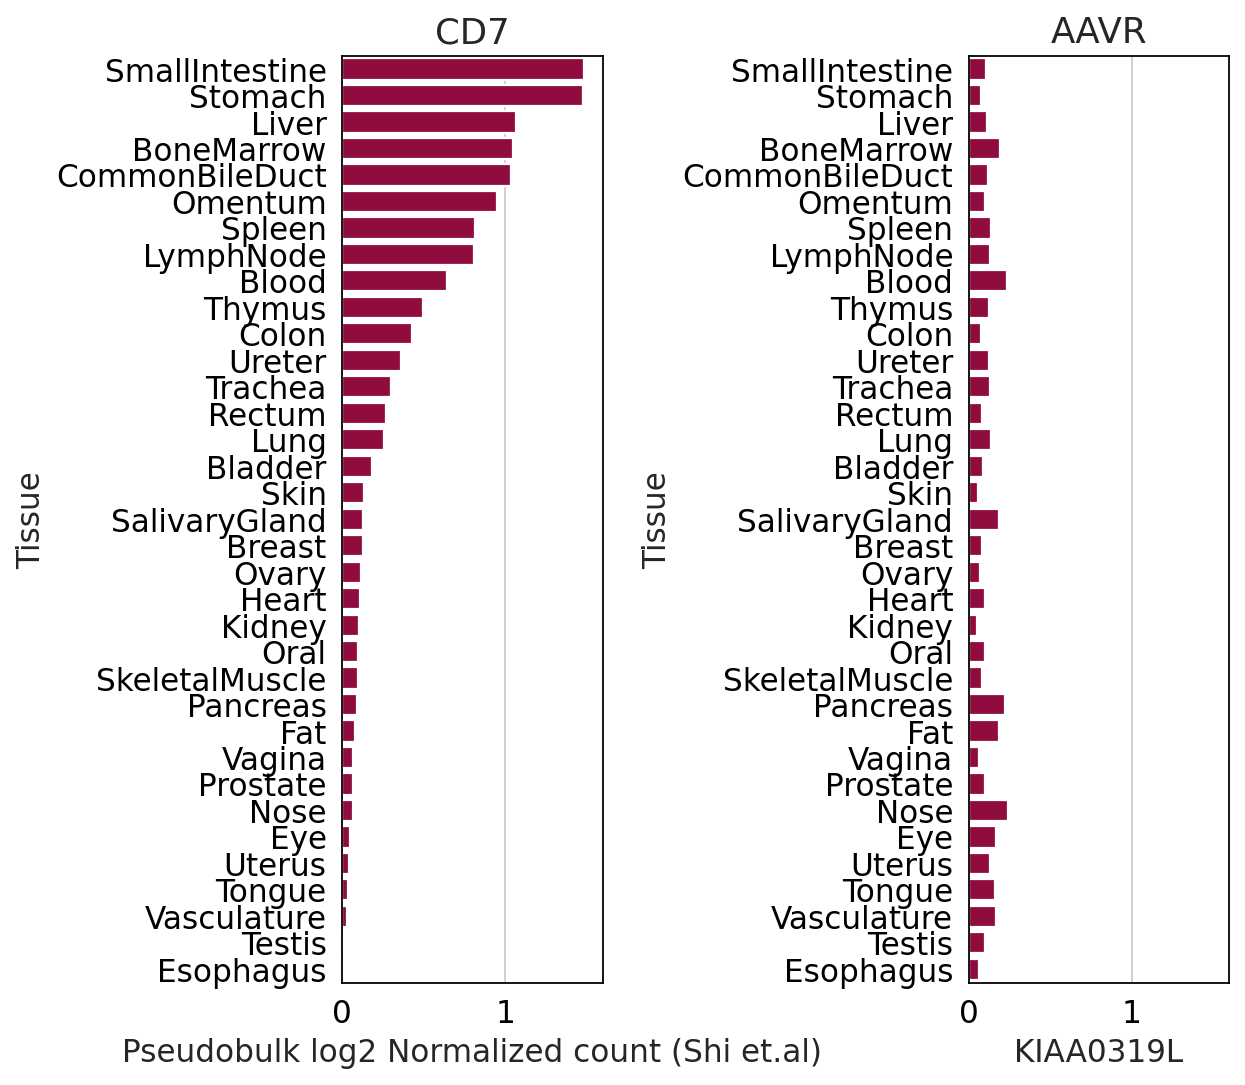

In [271]:
#plt.figure(figsize=(2, 10))
fig = plt.figure(figsize=(8, 13))
gs = fig.add_gridspec(2, 2, width_ratios=[1, 1], height_ratios=[1, 1])

ax1 = fig.add_subplot(gs[0, 0])

df_tissue_mean = df_tissue_mean.sort_values(by='CD7', ascending=False)
sns.barplot(
    data=df_tissue_mean,
    x='CD7',      # 横坐标：表达量
    y='tissue',          # 纵坐标：组织类型
    order=df_tissue_mean['tissue'],
    #hue='CD7',          # 分组：基因名称
    palette=["#900C3F"],  # 自定义颜色
    errorbar=None,             # 显示标准差
    #capsize=0.1,         # 误差线帽大小
    saturation=1       # 颜色饱和度
)
plt.title('CD7', fontsize=16)
plt.xlabel('Pseudobulk log2 Normalized count (Shi et.al)', fontsize=14)
plt.ylabel('Tissue', fontsize=14)
ax2 = fig.add_subplot(gs[0, 1])
df_tissue_mean = df_tissue_mean.sort_values(by='CD7', ascending=False)
sns.barplot(
    data=exp_df,
    x='KIAA0319L',      # 横坐标：表达量
    y='tissue',          # 纵坐标：组织类型
    order=df_tissue_mean['tissue'],
    #hue='CD7',          # 分组：基因名称
    palette=["#900C3F"],  # 自定义颜色
    errorbar=None,             # 显示标准差
    #capsize=0.1,         # 误差线帽大小
    saturation=1       # 颜色饱和度
)
plt.title('AAVR', fontsize=16)
#plt.xlabel('Pseudobulk log2 Normalized count (Shi et.al)', fontsize=14)
plt.ylabel('Tissue', fontsize=14)
plt.tight_layout()
x_min = 0
x_max = 1.6
ax1.set_xlim(x_min, x_max)
ax2.set_xlim(x_min, x_max)
plt.savefig('/home/chengennong/ylp/aav/cd7_exp/fig/bar_CD7_AAVR_shi.pdf', bbox_inches='tight')
plt.show()

In [ ]:
from adjustText import adjust_text
def gen_mpl_labels(
    adata, groupby, exclude=(), ax=None, adjust_kwargs=None, text_kwargs=None
):
    if adjust_kwargs is None:
        adjust_kwargs = {"text_from_points": False}
    if text_kwargs is None:
        text_kwargs = {}

    medians = {}

    for g, g_idx in adata.obs.groupby(groupby).groups.items():
        if g in exclude:
            continue
        medians[g] = np.median(adata[g_idx].obsm["X_umap"], axis=0)

    if ax is None:
        texts = [
            plt.text(x=x, y=y, s=k, **text_kwargs) for k, (x, y) in medians.items()
        ]
    else:
        texts = [ax.text(x=x, y=y, s=k, **text_kwargs) for k, (x, y) in medians.items()]

    adjust_text(texts, **adjust_kwargs)


In [273]:
#Define a nice colour map for gene expression
colors2 = plt.cm.Reds(np.linspace(0, 1, 128))
colors3 = plt.cm.Greys_r(np.linspace(0.7,0.8,20))
colorsComb = np.vstack([colors3, colors2])
mymap = colors.LinearSegmentedColormap.from_list('my_colormap', colorsComb)
adata.obs["Tissue"]=adata.obs["tissue"]

adata.uns['majorCluster_colors']=["#1f77b4","#ff7f0e","#2ca02c","#d62728","#9467bd","#8c564b","#e377c2","#7f7f7f"]
adata.uns['system_colors']=["#1f77b4","#ff7f0e","#2ca02c","#d62728","#9467bd","#8c564b","#e377c2","#7f7f7f",'#B79762', '#8FB0FF']
adata.uns['tissue_colors']=["#393b79", "#5254a3", "#6b6ecf", "#9c9ede", "#637939", "#8ca252", "#b5cf6b", "#cedb9c", "#8c6d31", "#bd9e39", "#e7ba52", "#e7cb94", "#843c39", "#ad494a", "#d6616b", "#e7969c", "#7b4173", "#a55194", "#ce6dbd", "#de9ed6", "#3182bd", "#6baed6", "#9ecae1", "#c6dbef", "#e6550d", "#fd8d3c", "#fdae6b", "#fdd0a2", "#31a354", "#74c476", "#a1d99b", "#c7e9c0", "#756bb1", "#9e9ac8", "#bcbddc"]

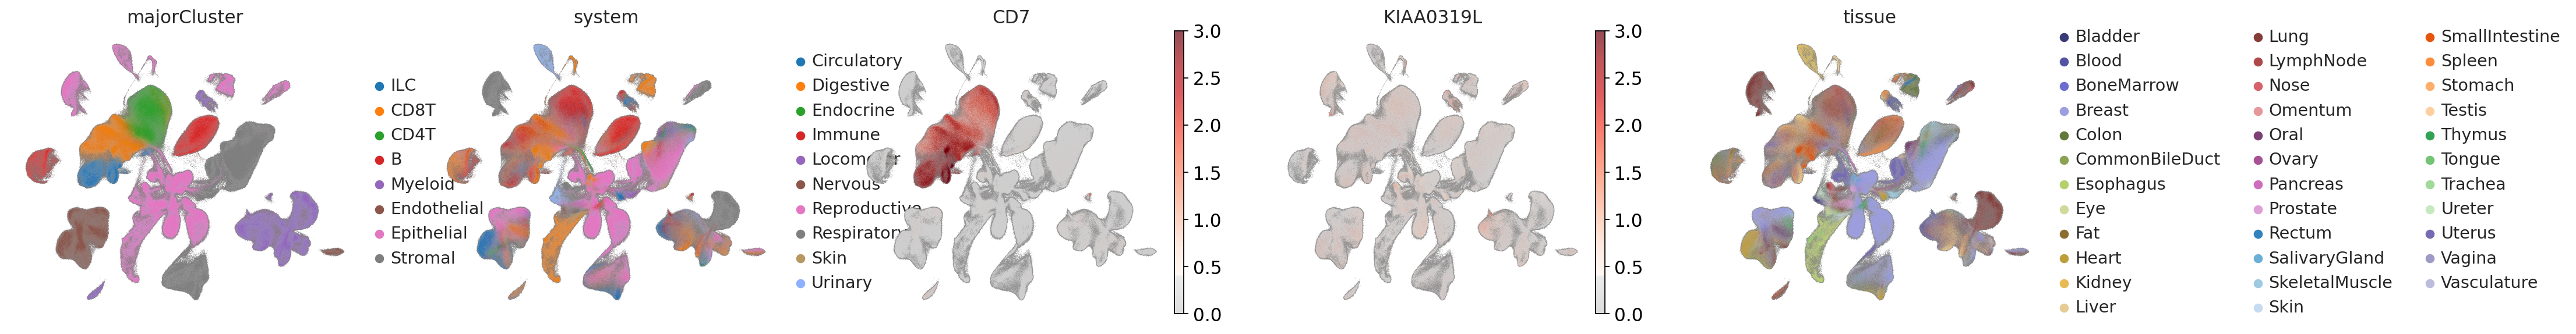

In [287]:
desired_order = ["ILC","CD8T","CD4T","B","Myeloid","Endothelial","Epithelial","Stromal"]
adata.obs['majorCluster'] = adata.obs['majorCluster'].cat.reorder_categories(desired_order)
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(28, 4))
sc.pl.umap(adata, color="majorCluster", show=False,ax=axes[0], #legend_fontsize='4',
           #legend_loc="no data",
           add_outline=True, legend_fontweight = "normal",
           frameon=False)
sc.pl.umap(adata, color="system", show=False,ax=axes[1], #legend_fontsize='4',
           #legend_loc="no data",
           add_outline=True, legend_fontweight = "normal",
           frameon=False)
sc.pl.umap(adata, color=['CD7'], add_outline=True, ax=axes[2],show=False,
           use_raw=False, wspace=0.5, legend_fontsize='x-small',frameon=False, vmax=3,color_map=mymap)
sc.pl.umap(adata, color=['KIAA0319L'], add_outline=True, ax=axes[3],show=False,
           use_raw=False, wspace=0.5, legend_fontsize='x-small',frameon=False, vmax=3,color_map=mymap)

sc.pl.umap(adata, color="tissue", show=False,ax=axes[4], #legend_fontsize='4',
           #legend_loc="no data",
           add_outline=True, legend_fontweight = "normal",
           frameon=False)

plt.savefig('/home/chengennong/ylp/aav/cd7_exp/fig/umap_CD7_AAVR_shi.pdf', bbox_inches='tight',dpi=500)
#plt.show()

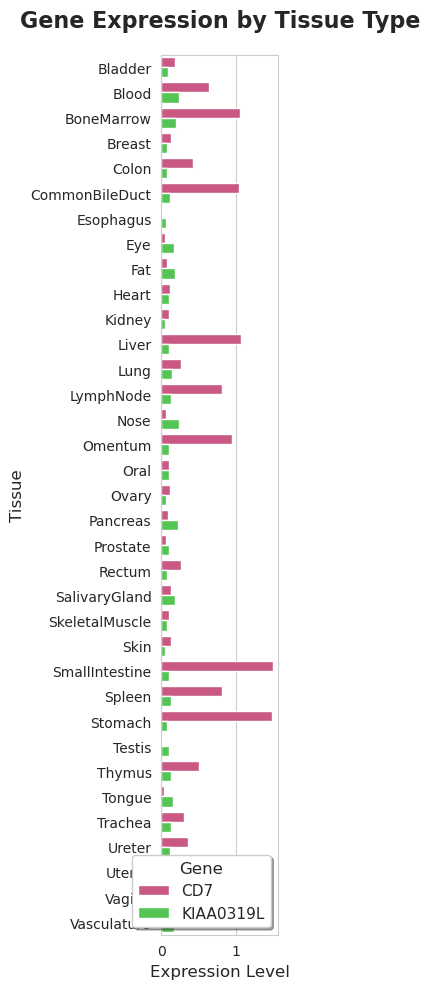

In [107]:
# 设置图形样式
plt.figure(figsize=(3, 10))
sns.set_style("whitegrid")

# 绘制分组柱状图
ax = sns.barplot(
    data=df_long,
    x='Expression',      # 横坐标：表达量
    y='tissue',          # 纵坐标：组织类型
    hue='Gene',          # 分组：基因名称
    palette=["#C95984", "#54C554"],  # 自定义颜色
    errorbar=None,             # 显示标准差
    #capsize=0.1,         # 误差线帽大小
    saturation=1       # 颜色饱和度
)

# 添加图表装饰
plt.title('Gene Expression by Tissue Type', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Expression Level', fontsize=12)
plt.ylabel('Tissue', fontsize=12)

# 调整图例
plt.legend(
    title='Gene',
    title_fontsize=12,
    fontsize=11,
    loc='lower right',
    frameon=True,
    fancybox=True,
    shadow=True
)

# 添加数值标签（可选）
#for container in ax.containers:
#    ax.bar_label(container, fmt='%.2f', padding=3, fontsize=9)

plt.tight_layout()
plt.show()

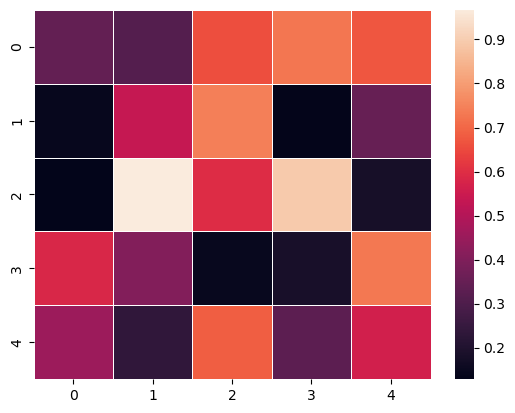

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 示例数据
data = np.random.rand(5, 5)

# 去除内部网格线，保留外边框
sns.heatmap(data, linewidths=0.5)
plt.show()